In [128]:
print(f"UNIT 4 HOMEWORK ASSIGNMENT: A WHALE OFF THE PORT(FOLIO)")
print(f"This script will evaluate performance and risk amongst various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.")



UNIT 4 HOMEWORK ASSIGNMENT: A WHALE OFF THE PORT(FOLIO)
This script will evaluate performance and risk amongst various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.


In [94]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [2]:
##Read in the data
whale_returns = pd.read_csv('whale_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv('algo_returns.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_history = pd.read_csv('sp500_history.csv', index_col='Date', parse_dates=True, infer_datetime_format=True)



In [3]:
##Check count of nulls
whale_returns.isnull().mean() * 100
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
##Drop nulls
whale_returns = whale_returns.dropna()

In [5]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
##Validate nulls removed
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
##Check count of nulls
algo_returns.isnull().mean() * 100
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
##Drop nulls
algo_returns = algo_returns.dropna()

In [9]:
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [10]:
##Validate nulls removed
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [12]:
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [14]:
sp500_history['Close']

Date
2019-04-23    $2933.68
2019-04-22    $2907.97
2019-04-18    $2905.03
2019-04-17    $2900.45
2019-04-16    $2907.06
                ...   
2012-10-05    $1460.93
2012-10-04    $1461.40
2012-10-03    $1450.99
2012-10-02    $1445.75
2012-10-01    $1444.49
Name: Close, Length: 1649, dtype: object

In [16]:
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')

In [18]:
sp500_history['Close'] = sp500_history['Close'].astype(float)

In [19]:
sp500_history['Close'].dtypes

dtype('float64')

In [20]:
##Calculate Daily Returns
daily_whale_returns = whale_returns.pct_change().dropna()
daily_algo_returns = algo_returns.pct_change().dropna()
daily_sp500_returns = sp500_history.pct_change().dropna()

##Rename S&P Close Column
daily_sp500_returns.rename(columns={'Close':'S&P 500'}, inplace=True)

In [21]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame 
all_returns = pd.concat([daily_whale_returns, daily_algo_returns, daily_sp500_returns], axis='columns', join='inner')

In [137]:
all_returns.sort_index()
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.001195
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.014378
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.003929
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.017254
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,0.001921


In [138]:
print(f"PERFORMANCE ANAYLSIS - Plots of Daily Returns and Cumulative Returns")

PERFORMANCE ANAYLSIS - Plots of Daily Returns and Cumulative Returns


<AxesSubplot:title={'center':'Daily Returns for Whale Portfolio, Algo Portfolio and S&P 500'}, xlabel='Date'>

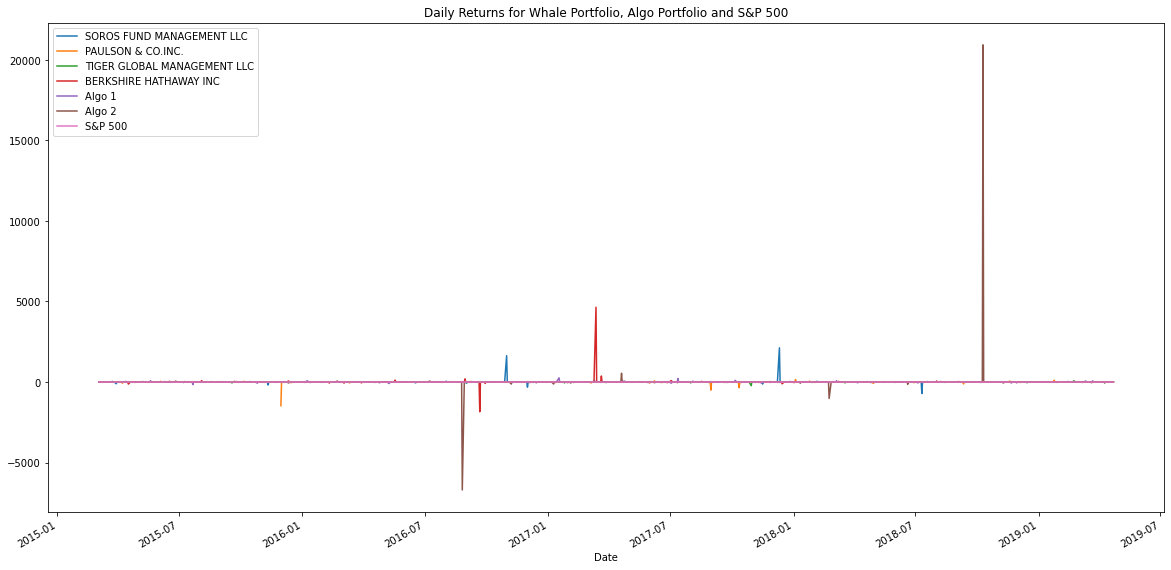

In [139]:
all_returns.plot(figsize = (20,10),title = 'Daily Returns for Whale Portfolio, Algo Portfolio and S&P 500')

In [140]:
##Calculate Cumulative Returns 
cumulative_returns_whale = (1+ daily_whale_returns).cumprod() - 1
cumulative_returns_algo = (1+ daily_algo_returns).cumprod() - 1
cumulative_returns_sp500 = (1+ daily_sp500_returns).cumprod() - 1

<AxesSubplot:title={'center':'Cumulative Returns of Whale Portfolio: 2015 -2019'}, xlabel='Date'>

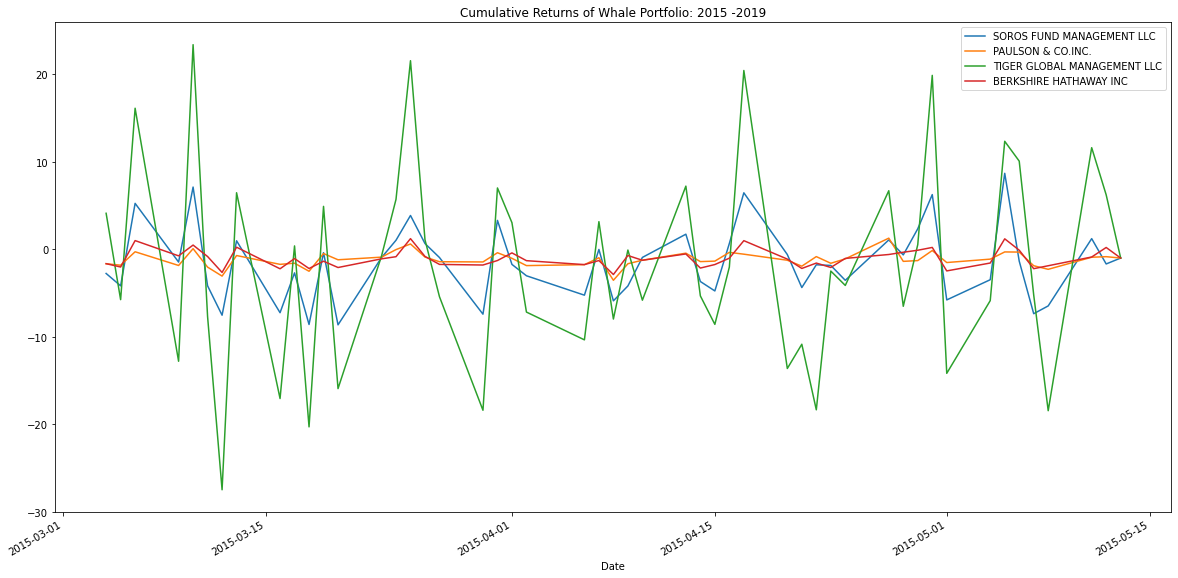

In [141]:
##Plot Cumulative Returns
cumulative_returns_whale.plot(figsize = (20,10), title= 'Cumulative Returns of Whale Portfolio: 2015 -2019')

<AxesSubplot:title={'center':'Cumulative Returns of Algorithmic Portfolio: 2014 -2019'}, xlabel='Date'>

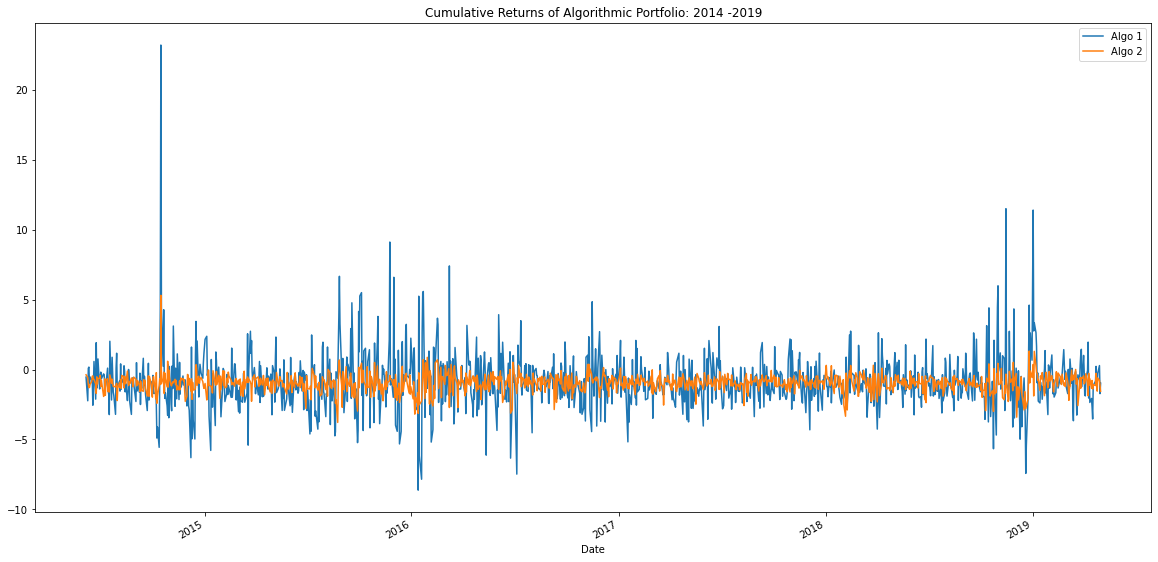

In [142]:
cumulative_returns_algo.plot(figsize = (20,10), title= 'Cumulative Returns of Algorithmic Portfolio: 2014 -2019')

<AxesSubplot:title={'center':'Cumulative Returns of S&P 500: 2013 -2019'}, xlabel='Date'>

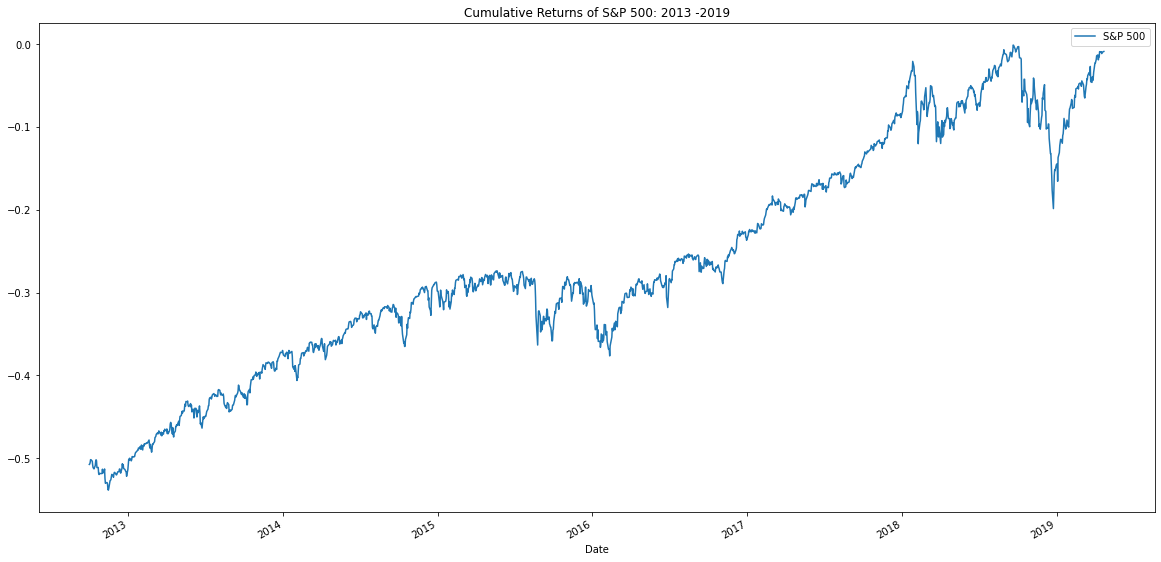

In [143]:
cumulative_returns_sp500.plot(figsize = (20,10), title= 'Cumulative Returns of S&P 500: 2013 -2019')

In [144]:
cumulative_returns_all = (1 + all_returns).cumprod() - 1
cumulative_returns_all.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.001195
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,0.013166
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,0.009185
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,0.026598
2015-03-10,7.109764,0.072323,23.376117,0.482649,-0.283470,11.802080,0.028570


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

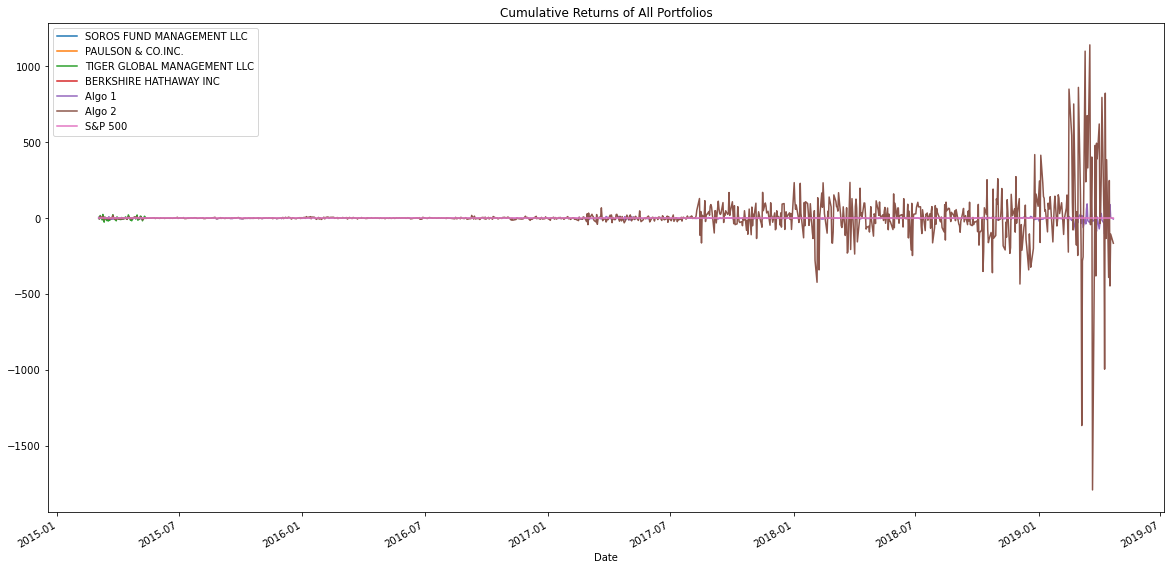

In [145]:
cumulative_returns_all.plot(figsize = (20,10), title= 'Cumulative Returns of All Portfolios')

In [146]:
print(f"PERFORMANCE ANALYSIS CONCLUSION: Based on the graph above, Algo 2 outperforms the S&P500.")

PERFORMANCE ANALYSIS CONCLUSION: Based on the graph above, Algo 2 outperforms the S&P500.


In [147]:
print(f"BOX PLOTS FOR WHALE, ALGO and S&P 500")

BOX PLOTS FOR WHALE, ALGO and S&P 500


<AxesSubplot:title={'center':'Whale, Algo, S&P Box Plots'}>

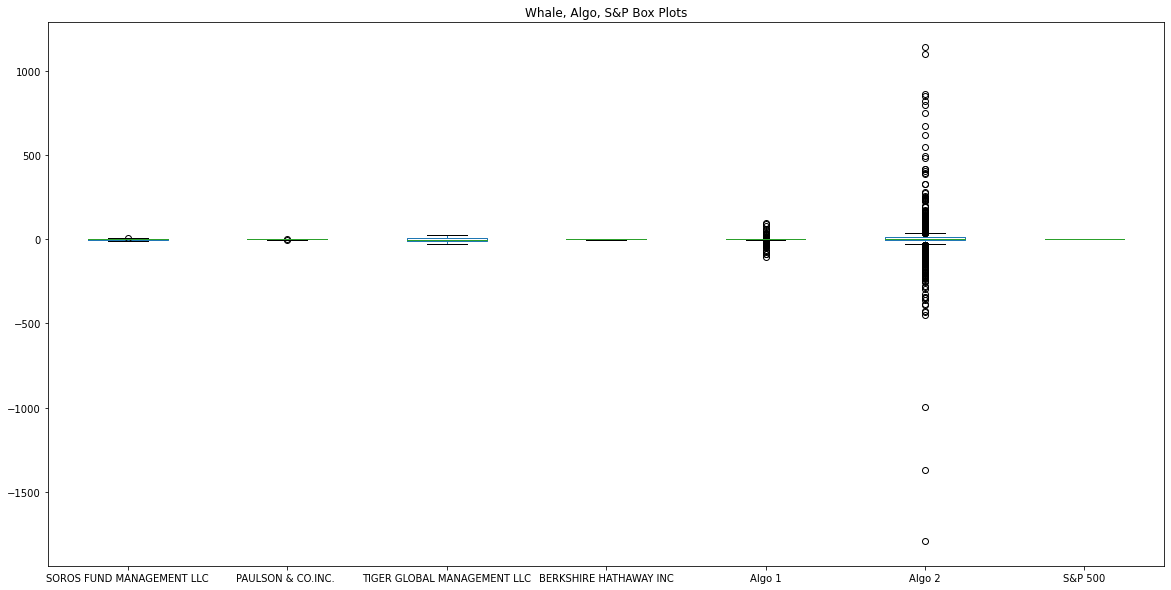

In [148]:
cumulative_returns_all.plot(kind='box', figsize = (20,10), title= 'Whale, Algo, S&P Box Plots')

In [149]:
print(f"STANDARD DEVIATIONS FOR WHALE AND ALGORITHMIC PORTFOLIOS")

STANDARD DEVIATIONS FOR WHALE AND ALGORITHMIC PORTFOLIOS


In [150]:
algo_returns_std = algo_returns.std()
algo_returns_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [151]:
whale_returns_std = whale_returns.std()
whale_returns_std 

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [152]:
sp500_returns_std = daily_sp500_returns.std()
sp500_returns_std

S&P 500    0.008135
dtype: float64

In [153]:
print(f"CONCLUSION:Given that the highest values in my standard deviation calculations are for Tiger Global Management LLC and Berkshire Hathaway Inc, I believe these portfolios are riskier than the S&P500.")

CONCLUSION:Given that the highest values in my standard deviation calculations are for Tiger Global Management LLC and Berkshire Hathaway Inc, I believe these portfolios are riskier than the S&P500.


In [154]:
##Calculate the annualized standard deviation (252 trading days)
#annualize our std of returns
annualized_std_algo = algo_returns_std * np.sqrt(252) ##this is some volatility formula that Izhar pulled up 
annualized_std_algo

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [155]:
annualized_std_whale = whale_returns_std * np.sqrt(252) ##this is some volatility formula that Izhar pulled up 
annualized_std_whale

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [156]:
annualized_std_sp500 = sp500_returns_std * np.sqrt(252) ##this is some volatility formula that Izhar pulled up 
annualized_std_sp500

S&P 500    0.129133
dtype: float64

In [157]:
print(f"ROLLING STATISTICS") 

ROLLING STATISTICS


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of S&P 500'}, xlabel='Date'>

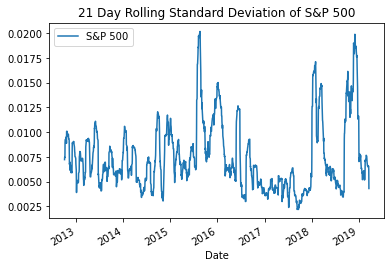

In [158]:
## Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
daily_sp500_returns.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation of S&P 500')

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of Whale Portfolio'}, xlabel='Date'>

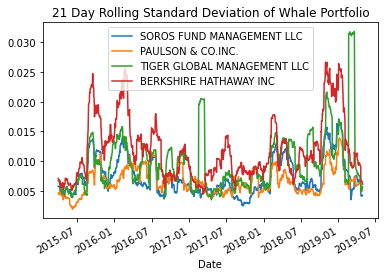

In [159]:
## Calculate and plot the rolling standard deviation for Whale and Algo Portfolios
whale_returns.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation of Whale Portfolio')

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of Algorithmic Portfolio'}, xlabel='Date'>

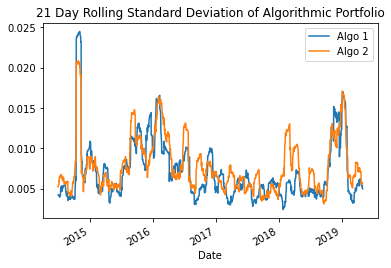

In [160]:
algo_returns.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation of Algorithmic Portfolio')

In [161]:
print(f"CORRELATION OF WHALE AND ALGO PORTFOLIOS TO THE S&P 500")

CORRELATION OF WHALE AND ALGO PORTFOLIOS TO THE S&P 500


In [162]:
correlation_all = all_returns.corr()
correlation_all 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.002943,0.022272,0.000428,0.000571,-0.005765,0.013211
PAULSON & CO.INC.,0.002943,1.000000,0.035587,0.002034,0.005825,0.010893,0.040110
TIGER GLOBAL MANAGEMENT LLC,0.022272,0.035587,1.000000,-0.014597,0.007730,-0.004645,0.000216
BERKSHIRE HATHAWAY INC,0.000428,0.002034,-0.014597,1.000000,-0.005593,0.003766,0.022152
Algo 1,0.000571,0.005825,0.007730,-0.005593,1.000000,0.000484,-0.022967
Algo 2,-0.005765,0.010893,-0.004645,0.003766,0.000484,1.000000,0.081118
S&P 500,0.013211,0.040110,0.000216,0.022152,-0.022967,0.081118,1.000000


<AxesSubplot:>

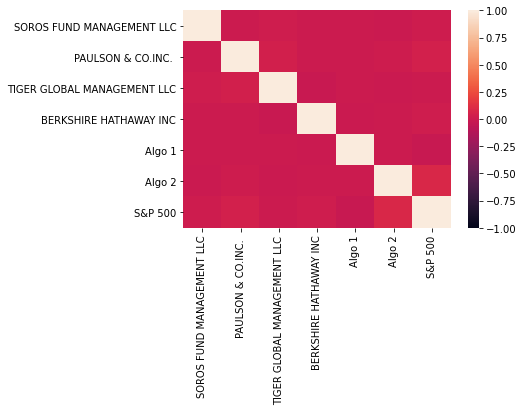

In [163]:
import seaborn as sns
sns.heatmap(correlation_all, vmin=-1, vmax=1)

In [182]:
print(f"CORRELATION CONCLUSION: Paulson & Co. Inc. is the closest to mimicking the S&P 500.")

CORRELATION CONCLUSION: Paulson & Co. Inc. is the closest to mimicking the S&P 500.


In [165]:
print(f"60-DAY BETA VALUES OF ALGORITHMIC STOCKS VS. S&P 500")

60-DAY BETA VALUES OF ALGORITHMIC STOCKS VS. S&P 500


In [166]:
##Calculate covariance of Algo stocks
rolling_covariance1 = daily_algo_returns['Algo 1'].rolling(window=60).cov(daily_sp500_returns['S&P 500'])
rolling_covariance1

Date
2012-10-01   NaN
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
              ..
2019-04-25   NaN
2019-04-26   NaN
2019-04-29   NaN
2019-04-30   NaN
2019-05-01   NaN
Length: 1655, dtype: float64

In [167]:
rolling_covariance2 = daily_algo_returns['Algo 2'].rolling(window=60).cov(daily_sp500_returns['S&P 500'])
rolling_covariance2

Date
2012-10-01   NaN
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
              ..
2019-04-25   NaN
2019-04-26   NaN
2019-04-29   NaN
2019-04-30   NaN
2019-05-01   NaN
Length: 1655, dtype: float64

In [168]:
##Calculate variance of S&P500 
rolling_variance = daily_sp500_returns['S&P 500'].rolling(window=60).var()
rolling_variance

Date
2019-04-22         NaN
2019-04-18         NaN
2019-04-17         NaN
2019-04-16         NaN
2019-04-15         NaN
                ...   
2012-10-05    0.000075
2012-10-04    0.000075
2012-10-03    0.000076
2012-10-02    0.000066
2012-10-01    0.000061
Name: S&P 500, Length: 1648, dtype: float64

In [169]:
##Calculate Betas 
rolling_algo1_beta = rolling_covariance1 / rolling_variance
rolling_algo1_beta

Date
2012-10-01   NaN
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
              ..
2019-04-25   NaN
2019-04-26   NaN
2019-04-29   NaN
2019-04-30   NaN
2019-05-01   NaN
Length: 1655, dtype: float64

In [170]:
rolling_algo2_beta = rolling_covariance2 / rolling_variance
rolling_algo2_beta

Date
2012-10-01   NaN
2012-10-02   NaN
2012-10-03   NaN
2012-10-04   NaN
2012-10-05   NaN
              ..
2019-04-25   NaN
2019-04-26   NaN
2019-04-29   NaN
2019-04-30   NaN
2019-05-01   NaN
Length: 1655, dtype: float64

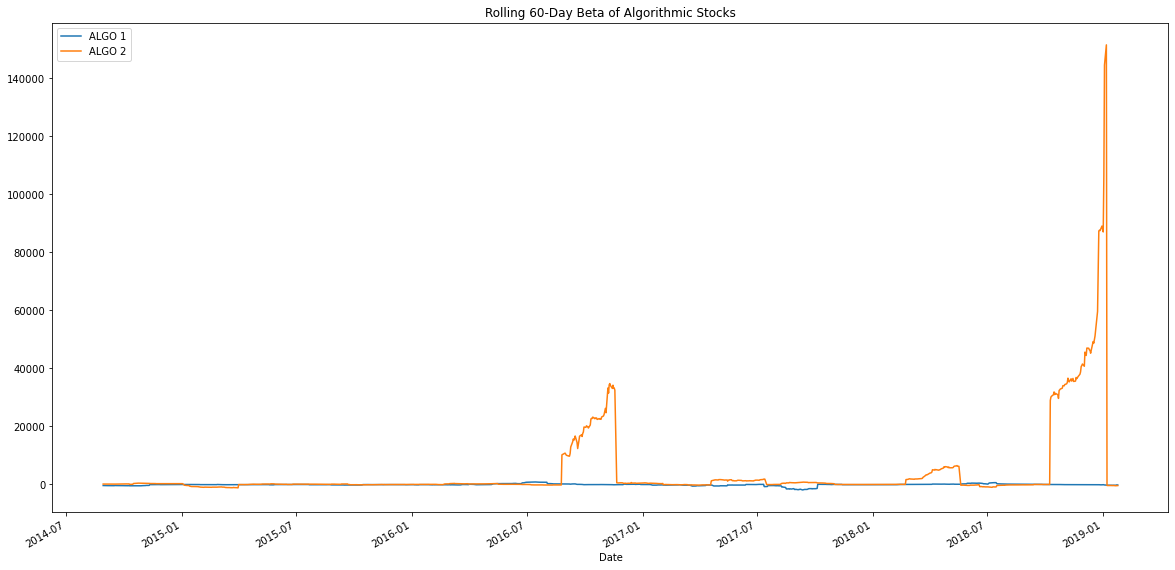

In [171]:
##Plot Betas 
ax = rolling_algo1_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algorithmic Stocks')
rolling_algo2_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend(["ALGO 1", "ALGO 2"])

In [172]:
print(f"BAR PLOTS OF SHARPE RATIOS FOR EACH PORTFOLIO")

BAR PLOTS OF SHARPE RATIOS FOR EACH PORTFOLIO


<AxesSubplot:title={'center':'Sharpe Ratios for Whale Portfolio'}>

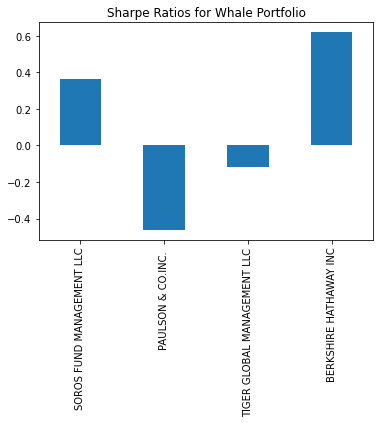

In [173]:
sharpe_ratios_whale = (whale_returns.mean() * 252) / (whale_returns.std() * np.sqrt(252))
sharpe_ratios_whale
sharpe_ratios_whale.plot(kind="bar", title="Sharpe Ratios for Whale Portfolio")

<AxesSubplot:title={'center':'Sharpe Ratios for Algorithmic Portfolio'}>

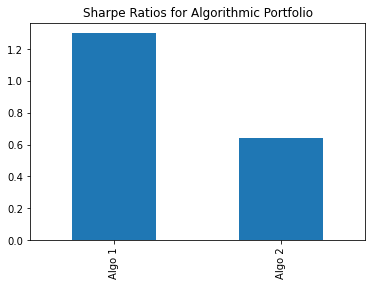

In [174]:
sharpe_ratios_algo = (algo_returns.mean() * 252) / (algo_returns.std() * np.sqrt(252))
sharpe_ratios_algo
sharpe_ratios_algo.plot(kind="bar", title="Sharpe Ratios for Algorithmic Portfolio")

<AxesSubplot:title={'center':'Sharpe Ratio for S&P 500'}>

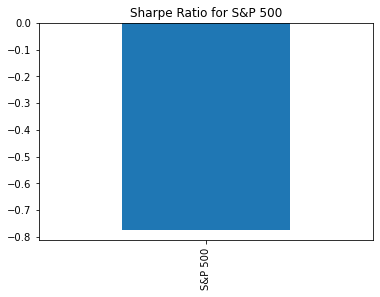

In [175]:
sharpe_ratios_sp = (daily_sp500_returns.mean() * 252) / (daily_sp500_returns.std() * np.sqrt(252))
sharpe_ratios_sp
sharpe_ratios_sp.plot(kind="bar", title="Sharpe Ratio for S&P 500")

In [176]:
print(f"SHARPE RATIO CONCLUSION: Based on the above Sharpe Ratio bar plots, the Algorithmic Portfolio does in fact outperform the Whale portfolio and the S&P 500.")

SHARPE RATIO CONCLUSION: Based on the above Sharpe Ratio bar plots, the Algorithmic Portfolio does in fact outperform the Whale portfolio and the S&P 500.


In [192]:
##Answer assignment questions in raw text(markdown) cells in the report 
output1 = (
    f"UNIT 4 Homework Assignment: A Whale Off the Portfolio\n"
    f"------------------------------------------------------------------\n"
    f"-This script will evaluate performance and risk amongst various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.\n" 
    f"-Based on the calculations and plots of Daily Returns and Cumulative Returns, it appears that Algo 2 outperforms the S&P 500.\n"
    f"-Given that the highest values in my standard deviation calculations are for Tiger Global Management LLC and Berkshire Hathaway Inc, it appears these portfolios are riskier than the S&P500.\n"
    f"-Looking at the correlation calculations, it appears that Paulson & Co. Inc. is the closest to mimicking the S&P 500.\n"
    f"-Finally, looking at the Sharpe Ratio calculations and bar plots illustrates that the Algorithmic portfolio does in fact outperform the Whale portfolio and the S&P 500 Index.\n"
)

#print output to ensure accuracy 
print(output1)

# Output file to text file
text_path1 = "output1.txt"

with open(text_path1,"w") as file:
    
# Write to print to Financial_Analysis_Summary 
    file.write("UNIT 4 Homework Assignment: A Whale Off the Portfolio")
    file.write("\n")
    file.write("-------------------------------------------------------")
    file.write("\n")
    file.write(f"-This script will evaluate performance and risk amongst various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.")
    file.write("\n")
    file.write(f"-Based on the calculations and plots of Daily Returns and Cumulative Returns, it appears that Algo 2 outperforms the S&P 500.")
    file.write("\n")
    file.write(f"-Given that the highest values in my standard deviation calculations are for Tiger Global Management LLC and Berkshire Hathaway Inc, it appears these portfolios are riskier than the S&P500.")
    file.write("\n")
    file.write(f"-Looking at the correlation calculations, it appears that Paulson & Co. Inc. is the closest to mimicking the S&P 500.")
    file.write("\n")
    file.write(f"-Finally, looking at the Sharpe Ratio calculations and bar plots illustrates that the Algorithmic portfolio does in fact outperform the Whale portfolio and the S&P 500 Index.")

UNIT 4 Homework Assignment: A Whale Off the Portfolio
------------------------------------------------------------------
-This script will evaluate performance and risk amongst various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.
-Based on the calculations and plots of Daily Returns and Cumulative Returns, it appears that Algo 2 outperforms the S&P 500.
-Given that the highest values in my standard deviation calculations are for Tiger Global Management LLC and Berkshire Hathaway Inc, it appears these portfolios are riskier than the S&P500.
-Looking at the correlation calculations, it appears that Paulson & Co. Inc. is the closest to mimicking the S&P 500.
-Finally, looking at the Sharpe Ratio calculations and bar plots illustrates that the Algorithmic portfolio does in fact outperform the Whale portfolio and the S&P 500 Index.

